In [1]:
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
test_data=pd.read_csv("test.csv")

In [3]:
test_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


## Feature Engineering

We will be performing all the below steps in Feature Engineering

1. Missing values handling for both numerical & categorical Variable
2. Temporal variables handling
3. Categorical variables: remove rare labels
4. Standarise the values of the variables to the same range

1. Missing values handling for both numerical & categorical Variable


a) Missing value handling for categorical feature:

In [4]:
# 1st to check whether there is any missing value in the whole dataset or not:
na_value_check=[feature for feature in test_data.columns if test_data[feature].isnull().sum()>1]
na_value_check

['MSZoning',
 'LotFrontage',
 'Alley',
 'Utilities',
 'MasVnrType',
 'MasVnrArea',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'BsmtFullBath',
 'BsmtHalfBath',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PoolQC',
 'Fence',
 'MiscFeature']

In [5]:
#2. now check for categorical value:

cat_var=[feature for feature in test_data if test_data[feature].dtype =="O"]

#3. now check whether there is any missing val or not:
cat_na=[feature for feature in cat_var if test_data[feature].isnull().sum()>1]

#4 show how many is missing value:
for feature in cat_na:
    print(f"{feature} has total {np.around(test_data[feature].isnull().sum()/len(test_data[feature]),4)} numbers of missing value")

MSZoning has total 0.0027 numbers of missing value
Alley has total 0.9267 numbers of missing value
Utilities has total 0.0014 numbers of missing value
MasVnrType has total 0.011 numbers of missing value
BsmtQual has total 0.0302 numbers of missing value
BsmtCond has total 0.0308 numbers of missing value
BsmtExposure has total 0.0302 numbers of missing value
BsmtFinType1 has total 0.0288 numbers of missing value
BsmtFinType2 has total 0.0288 numbers of missing value
Functional has total 0.0014 numbers of missing value
FireplaceQu has total 0.5003 numbers of missing value
GarageType has total 0.0521 numbers of missing value
GarageFinish has total 0.0535 numbers of missing value
GarageQual has total 0.0535 numbers of missing value
GarageCond has total 0.0535 numbers of missing value
PoolQC has total 0.9979 numbers of missing value
Fence has total 0.8012 numbers of missing value
MiscFeature has total 0.965 numbers of missing value


In [6]:
for feature in cat_na:
    test_data[feature]=test_data[feature].fillna("Missing")

In [7]:
test_data[cat_na]

,MSZoning,Alley,Utilities,MasVnrType,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PoolQC,Fence,MiscFeature
0,RH,Missing,AllPub,None,TA,TA,No,Rec,LwQ,Typ,Missing,Attchd,Unf,TA,TA,Missing,MnPrv,Missing
1,RL,Missing,AllPub,BrkFace,TA,TA,No,ALQ,Unf,Typ,Missing,Attchd,Unf,TA,TA,Missing,Missing,Gar2
2,RL,Missing,AllPub,None,Gd,TA,No,GLQ,Unf,Typ,TA,Attchd,Fin,TA,TA,Missing,MnPrv,Missing
3,RL,Missing,AllPub,BrkFace,TA,TA,No,GLQ,Unf,Typ,Gd,Attchd,Fin,TA,TA,Missing,Missing,Missing
4,RL,Missing,AllPub,None,Gd,TA,No,ALQ,Unf,Typ,Missing,Attchd,RFn,TA,TA,Missing,Missing,Missing
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,RM,Missing,AllPub,None,TA,TA,No,Unf,Unf,Typ,Missing,Missing,Missing,Missing,Missing,Missing,Missing,Missing
1455,RM,Missing,AllPub,None,TA,TA,No,Rec,Unf,Typ,Missing,CarPort,Unf,TA,TA,Missing,Missing,Missing
1456,RL,Missing,AllPub,None,TA,TA,No,ALQ,Unf,Typ,TA,Detchd,Unf,TA,TA,Missing,Missing,Missing
1457,RL,Missing,AllPub,None,Gd,TA,Av,GLQ,Unf,Typ,Missing,Missing,Missing,Missing,Missing,Missing,MnPrv,Shed




b) Missing value handling for numerical feature:

In [8]:
#1. check for numerical value:

num_var=[feature for feature in test_data if test_data[feature].dtype !="O"]

#2. now check whether there is any missing val or not:
num_na=[feature for feature in num_var if test_data[feature].isnull().sum()>1]

#4 show how many is missing value:
for feature in num_na:
    print(f"{feature} has total {np.around(test_data[feature].isnull().mean(),4)} numbers of missing value")

LotFrontage has total 0.1556 numbers of missing value
MasVnrArea has total 0.0103 numbers of missing value
BsmtFullBath has total 0.0014 numbers of missing value
BsmtHalfBath has total 0.0014 numbers of missing value
GarageYrBlt has total 0.0535 numbers of missing value


In [9]:
for feature in num_na:
    ## We will replace by using median since there are outliers
    median_value=test_data[feature].median()
    
    ## create a new feature to capture nan values
    test_data[feature+'nan']=np.where(test_data[feature].isnull(),1,0)
    test_data[feature].fillna(median_value,inplace=True)
    
test_data[num_na].isnull().sum()

LotFrontage     0
MasVnrArea      0
BsmtFullBath    0
BsmtHalfBath    0
GarageYrBlt     0
dtype: int64

2. Temporal Variable handling:

In [10]:
#find out the year column
Year_var=[feature for feature in test_data.columns if "Yr" in feature or 'Year' in feature or "yr" in feature]
print(Year_var)

['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold', 'GarageYrBltnan']


In [11]:
for feature in Year_var:
    if feature !="YrSold":
        test_data[feature]=test_data["YrSold"] - test_data[feature]

In [12]:
test_data[['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold', 'GarageYrBltnan']]

,YearBuilt,YearRemodAdd,GarageYrBlt,YrSold,GarageYrBltnan
0,49,49,49.0,2010,2010
1,52,52,52.0,2010,2010
2,13,12,13.0,2010,2010
3,12,12,12.0,2010,2010
4,18,18,18.0,2010,2010
...,...,...,...,...,...
1454,36,36,27.0,2006,2005
1455,36,36,36.0,2006,2006
1456,46,10,46.0,2006,2006
1457,14,14,27.0,2006,2005


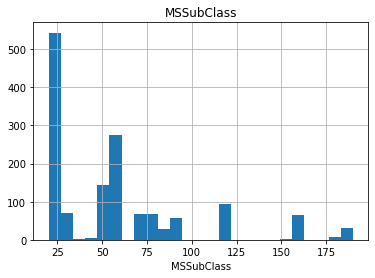

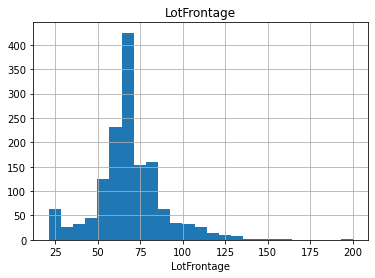

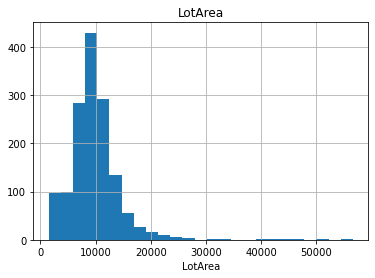

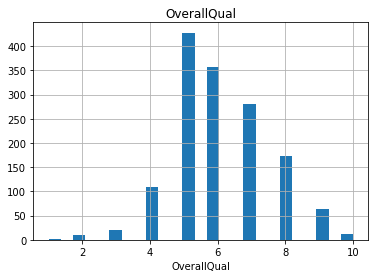

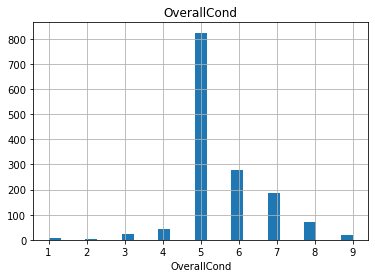

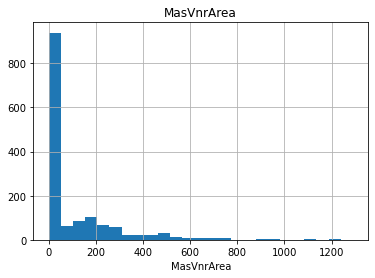

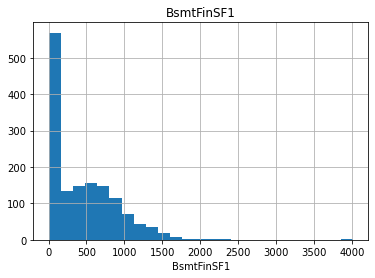

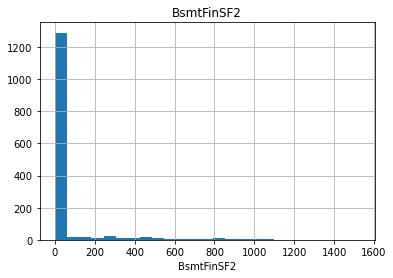

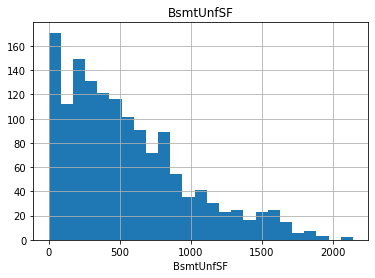

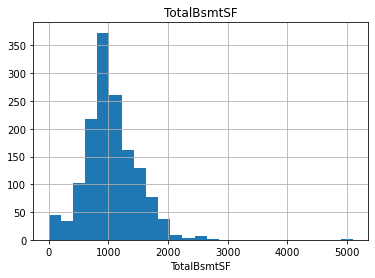

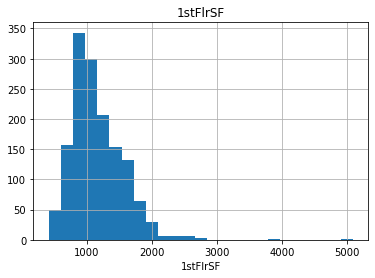

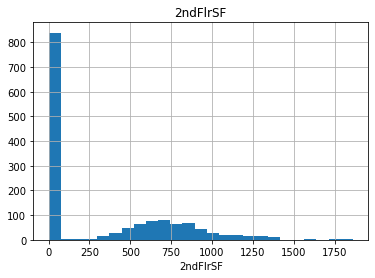

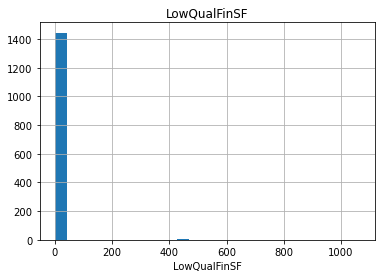

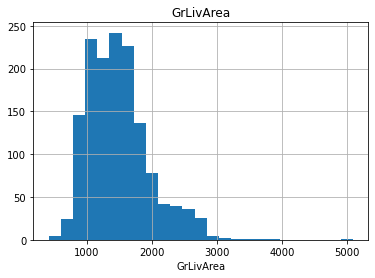

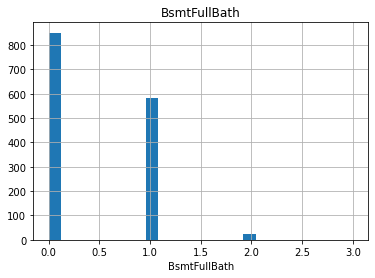

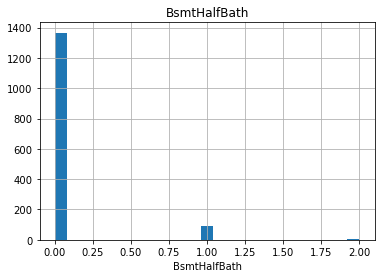

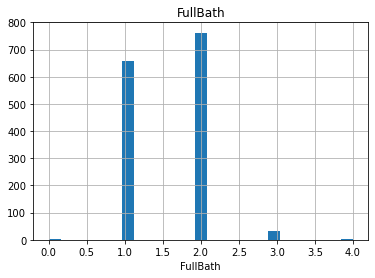

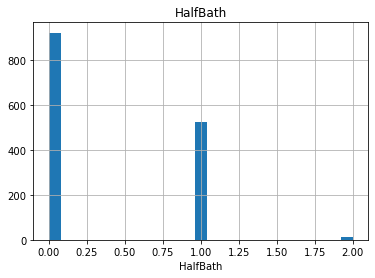

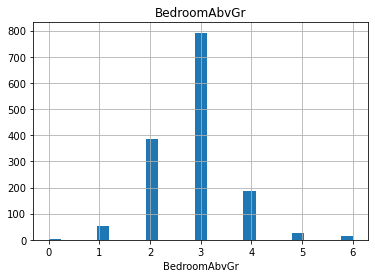

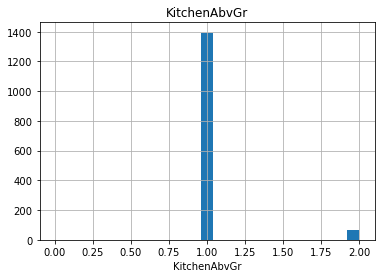

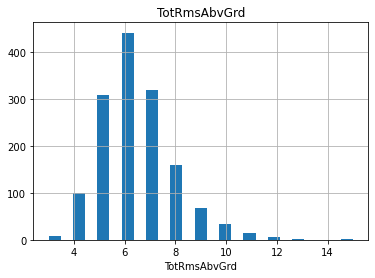

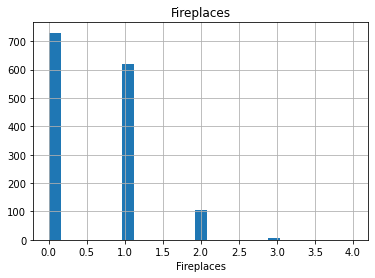

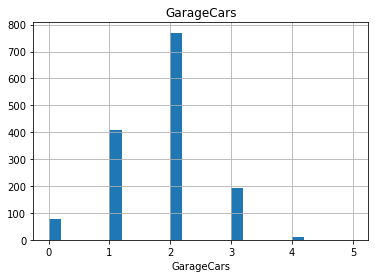

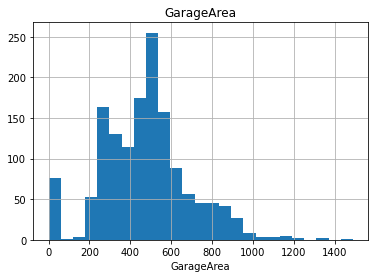

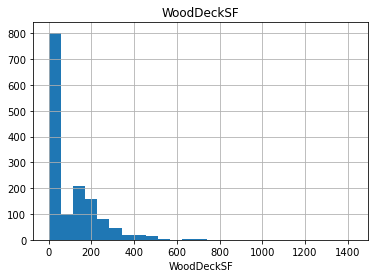

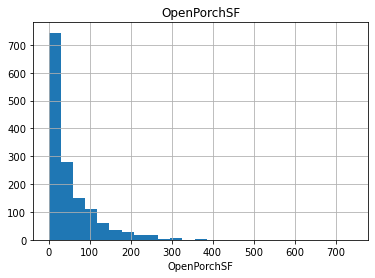

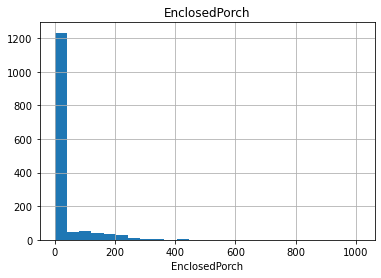

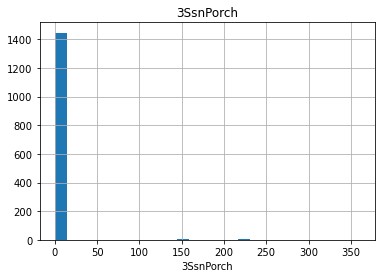

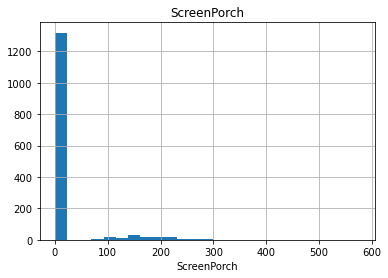

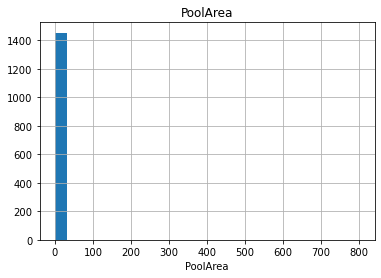

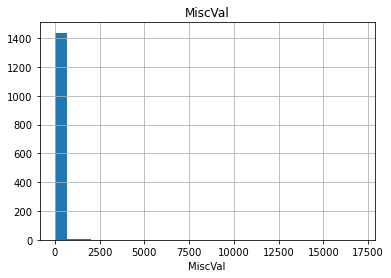

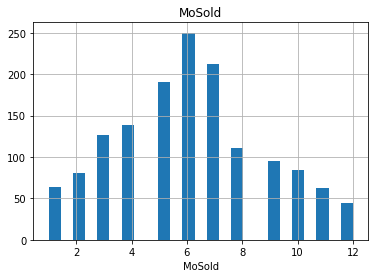

In [13]:
continuous_var=[feature for feature in num_var if feature not in Year_var+['Id']]
for feature in continuous_var:
    data=test_data.copy()
    data[feature].hist(bins=25)
    plt.xlabel(feature)
    plt.title(feature)
    plt.show()

In [14]:
continuous_var=[feature for feature in num_var if len(test_data[feature].unique())<25 and feature not in ["Id"]+ Year_var]
for feature in continuous_var:
    if 0 in test_data[feature].unique():
        pass
    else:
        test_data[feature]=np.log(test_data[feature])


In [15]:
test_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,MiscVal,MoSold,YrSold,SaleType,SaleCondition,LotFrontagenan,MasVnrAreanan,BsmtFullBathnan,BsmtHalfBathnan,GarageYrBltnan
0,1461,2.995732,RH,80.0,11622,Pave,Missing,Reg,Lvl,AllPub,...,0,1.791759,2010,WD,Normal,0,0,0,0,2010
1,1462,2.995732,RL,81.0,14267,Pave,Missing,IR1,Lvl,AllPub,...,12500,1.791759,2010,WD,Normal,0,0,0,0,2010
2,1463,4.094345,RL,74.0,13830,Pave,Missing,IR1,Lvl,AllPub,...,0,1.098612,2010,WD,Normal,0,0,0,0,2010
3,1464,4.094345,RL,78.0,9978,Pave,Missing,IR1,Lvl,AllPub,...,0,1.791759,2010,WD,Normal,0,0,0,0,2010
4,1465,4.787492,RL,43.0,5005,Pave,Missing,IR1,HLS,AllPub,...,0,0.000000,2010,WD,Normal,0,0,0,0,2010


## Feature Scaling

In [16]:
for feature in cat_var:
    print(f'{feature} has {test_data[feature].nunique()} unique category and the category names are {test_data[feature].unique()}')

MSZoning has 6 unique category and the category names are ['RH' 'RL' 'RM' 'FV' 'C (all)' 'Missing']
Street has 2 unique category and the category names are ['Pave' 'Grvl']
Alley has 3 unique category and the category names are ['Missing' 'Pave' 'Grvl']
LotShape has 4 unique category and the category names are ['Reg' 'IR1' 'IR2' 'IR3']
LandContour has 4 unique category and the category names are ['Lvl' 'HLS' 'Bnk' 'Low']
Utilities has 2 unique category and the category names are ['AllPub' 'Missing']
LotConfig has 5 unique category and the category names are ['Inside' 'Corner' 'FR2' 'CulDSac' 'FR3']
LandSlope has 3 unique category and the category names are ['Gtl' 'Mod' 'Sev']
Neighborhood has 25 unique category and the category names are ['NAmes' 'Gilbert' 'StoneBr' 'BrDale' 'NPkVill' 'NridgHt' 'Blmngtn'
 'NoRidge' 'Somerst' 'SawyerW' 'Sawyer' 'NWAmes' 'OldTown' 'BrkSide'
 'ClearCr' 'SWISU' 'Edwards' 'CollgCr' 'Crawfor' 'Blueste' 'IDOTRR'
 'Mitchel' 'Timber' 'MeadowV' 'Veenker']
Conditi

In [17]:
from sklearn.preprocessing import LabelEncoder

# Initialize the label encoder
label_encoder = LabelEncoder()

# Fit and transform the categorical column in your test dataset
for feature in cat_var:
    test_data[feature] = test_data[feature].astype(str)
    label_encoder.fit(test_data[feature])
    test_data[feature] = label_encoder.transform(test_data[feature])


In [18]:
test_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,MiscVal,MoSold,YrSold,SaleType,SaleCondition,LotFrontagenan,MasVnrAreanan,BsmtFullBathnan,BsmtHalfBathnan,GarageYrBltnan
0,1461,2.995732,3,80.0,11622,1,1,3,3,0,...,0,1.791759,2010,8,4,0,0,0,0,2010
1,1462,2.995732,4,81.0,14267,1,1,0,3,0,...,12500,1.791759,2010,8,4,0,0,0,0,2010
2,1463,4.094345,4,74.0,13830,1,1,0,3,0,...,0,1.098612,2010,8,4,0,0,0,0,2010
3,1464,4.094345,4,78.0,9978,1,1,0,3,0,...,0,1.791759,2010,8,4,0,0,0,0,2010
4,1465,4.787492,4,43.0,5005,1,1,0,1,0,...,0,0.000000,2010,8,4,0,0,0,0,2010


In [30]:
from sklearn.preprocessing import StandardScaler

# Initialize the StandardScaler
scaler = StandardScaler()

# Define the numerical features to scale (exclude the "ID" column)
scale_features = [feature for feature in test_data.columns if feature != "ID"]

# Fit the scaler on the test data (only the numerical features)
scaler.fit(test_data[scale_features])

# Transform the test data (only the numerical features) using the same scaler
scaled_test_data = scaler.transform(test_data[scale_features])

# Create a DataFrame for the scaled numerical features
scaled_test_df = pd.DataFrame(scaled_test_data, columns=scale_features)

# Concatenate the "ID" column and the scaled numerical features
test_data_scaled = pd.concat([test_data["Id"].reset_index(drop=True), scaled_test_df], axis=1)


In [32]:
test_data_scaled.head()

,Id,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,...,MiscVal,MoSold,YrSold,SaleType,SaleCondition,LotFrontagenan,MasVnrAreanan,BsmtFullBathnan,BsmtHalfBathnan,GarageYrBltnan
0,1461,-1.730864,-1.120208,-1.071528,0.567330,0.363929,0.06426,0.083814,0.742620,0.31870,...,-0.092244,0.200591,1.713905,0.324245,0.201383,-0.429247,-0.101921,-0.03705,-0.03705,1.732039
1,1462,-1.728490,-1.120208,0.044360,0.615963,0.897861,0.06426,0.083814,-1.384637,0.31870,...,19.730438,0.200591,1.713905,0.324245,0.201383,-0.429247,-0.101921,-0.03705,-0.03705,1.732039
2,1463,-1.726115,0.420628,0.044360,0.275532,0.809646,0.06426,0.083814,-1.384637,0.31870,...,-0.092244,-1.020176,1.713905,0.324245,0.201383,-0.429247,-0.101921,-0.03705,-0.03705,1.732039
3,1464,-1.723741,0.420628,0.044360,0.470064,0.032064,0.06426,0.083814,-1.384637,0.31870,...,-0.092244,0.200591,1.713905,0.324245,0.201383,-0.429247,-0.101921,-0.03705,-0.03705,1.732039
4,1465,-1.721367,1.392788,0.044360,-1.232092,-0.971808,0.06426,0.083814,-1.384637,-2.53396,...,-0.092244,-2.955047,1.713905,0.324245,0.201383,-0.429247,-0.101921,-0.03705,-0.03705,1.732039
